In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pip install wordcloud

In [59]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import ast
from wordcloud import WordCloud
from collections import Counter
from collections import defaultdict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# !pip install gensim

In [5]:
from gensim.models.phrases import Phraser
from gensim.models import Phrases
from gensim import corpora
import gensim.models as models
from gensim.models.ldamulticore import LdaMulticore, LdaModel
from gensim.models import CoherenceModel

In [6]:
# pip install pyLDAvis

In [7]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# **Load and preparing data**

In [8]:
df = pd.read_csv('avengers_pre.csv')

# Tokenzation

In [9]:
# We divide the text into tokens
df['Tokens'] = df['text_pre'].astype(str).apply(nltk.word_tokenize)

In [10]:
df

,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre,Tokens
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...,"[i, be, a, bit, upset, about, how, they, handl..."
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...,"[so, basically, the, dragonballz, type, of, ti..."
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...,"[nanotech, brah, tony, be, peak, intelligence,..."
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...,"[honestly, this, feel, like, such, an, ending,..."
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak,"[he, be, there, but, they, probably, do, not, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
58921,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiujykn,aminabz,wow. really just with colour pencil?,2020-02-26 18:47:14,2,wow really just with colour pencil,"[wow, really, just, with, colour, pencil]"
58922,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiuwpnr,mattwart,"Yup, the drawing was done with colour pencil (...",2020-02-26 20:40:53,2,yup the drawing be do with colour pencil prism...,"[yup, the, drawing, be, do, with, colour, penc..."
58923,UnrealLuigi,'Avengers: Endgame' limited edition poster by ...,18043,https://i.redd.it/2cmyvbdx52h41.jpg,1.581760e+09,fmh8f03,blackbutterfree,"Looks to be missing Howard the Duck, Kraglin (...",2020-04-05 07:03:57,1,look to be miss howard the duck kraglin both b...,"[look, to, be, miss, howard, the, duck, kragli..."
58924,gianben123,Avengers: Endgame | Tony & teenage Morgan Star...,17416,https://v.redd.it/5hhvq02eh8y31,1.573555e+09,fojdf5j,hwengiue,"First of all, Katherine Langford has nothing t...",2020-04-25 12:26:16,2,first of all katherine langford have nothing t...,"[first, of, all, katherine, langford, have, no..."


In [11]:
# Initialize a Counter to count token frequencies
token_counter = Counter()

# Count frequencies
for word_list in df['Tokens']:
    token_counter.update(word_list)
# Create a DataFrame from the sorted_token_counter
df_frequencies = pd.DataFrame(list(token_counter.items()), columns=['Token', 'Frequency'])

In [12]:
df_frequencies

,Token,Frequency
0,i,58340
1,be,121549
2,a,42837
3,bit,1348
4,upset,165
...,...,...
23102,procreate,2
23103,deviantart,2
23104,shoulderpad,1
23105,artiste,1


In [13]:
processed_corpus = [token for token in  df['Tokens']]

# Stop word removal

In [14]:
#Before proceeding, we want to associate each word in the corpus with a unique integer ID.
dictionary = corpora.Dictionary(processed_corpus)

print(f"size before stop word removal and removing most and less frequent words: {len(dictionary)}")

size before stop word removal and removing most and less frequent words: 23107


In [15]:
document_counts = Counter([token_id for doc in processed_corpus for token_id in set(doc)])

We import the list of stop words in English. After reviewing the list, we exclude 'not' from it because it is useful for bigrams and trigrams. However, we add 'rimosso' and 'cancellato' to it, two words present in our corpus that clearly refer to actions taken by Reddit and applied to the comment, but are not part of the original comment itself. Therefore, we want to proceed to eliminate them.

In [16]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [17]:
sorted_stop_words = sorted(stop_words)
print(sorted_stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [18]:
# we decided to exclude not from the list of stop_words
stop_words.remove('not')
# we add words that aren't part of the original comments
stop_words.update(['cancellato', 'rimosso'])

In [19]:
stop_ids = [dictionary.token2id[word] for word in stop_words if word in dictionary.token2id]

# Removal of stop word IDs from the dictionary
dictionary.filter_tokens(bad_ids=stop_ids)

In [20]:
# we filter the corpus using the new dictionary
filtered_corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]
filtered_corpus = [[dictionary[id_termine] for id_termine, _ in doc] for doc in filtered_corpus]

In [21]:
print("Number of unique words in the dictionary after stop word removal:", len(dictionary.token2id))

Number of unique words in the dictionary after stop word removal: 22965


# Bigrams and trigrams

In [22]:
# Find bigrams
bigram = Phrases(filtered_corpus, min_count=200, threshold=0.3, scoring='npmi') #threshold is based on Normalized Pointwise Mutual Information (npmi)
bigram_mod = Phraser(bigram)

# Find trigrams
trigram = Phrases(bigram[filtered_corpus], min_count=50,  threshold=0.3, scoring='npmi')
trigram_mod = Phraser(trigram)

# Apply bigram and trigram models to the texts
filtered_corpus = [bigram_mod[doc] for doc in filtered_corpus]
filtered_corpus = [trigram_mod[bigram_mod[doc]] for doc in filtered_corpus]

In [23]:
# Set to store unique bigram words
unique_bigrams = set()

# Iterate over all documents
for idx in range(len(filtered_corpus)):
    # Add bigrams to set and print words containing underscores
    words_with_underscore = [token for token in filtered_corpus[idx] if '_' in token]
    unique_bigrams.update(words_with_underscore)

# Set to store unique trigram words with two underscores
unique_trigrams = set()

# Iterate over all documents
for idx in range(len(filtered_corpus)):
    # Add trigrams to set and print words containing two underscores
    words_with_two_underscores = [token for token in filtered_corpus[idx] if token.count('_') == 2]
    unique_trigrams.update(words_with_two_underscores)

In [24]:
print(len(unique_bigrams))
print(len(unique_trigrams))

1047
59


In [25]:
sorted_bigrams = sorted(unique_bigrams)

# Display the sorted list
for bigram in sorted_bigrams:
    print(bigram)

able_arc
able_fight
able_use
adam_warlock
affect_change
age_ultron
alone_get
already_get
also_awesome
also_bring
also_everyone
also_people
also_portal
also_way
alternate_assume
alternate_change
alternate_change_create
alternate_create
always_cap
always_movie
amazing_ever
amazing_mjolnir
america_avengers
america_big
ancient_cap
ancient_hulk_one
ancient_infinity_one
ancient_one
another_battle
another_go
another_point
ant_man
ant_man_wasp
anyone_endgame
anyone_marvel
anyone_think
anything_find
anything_love
anything_story
anything_try
anything_want
arc_banner
arc_fight
army_could
army_moment
around_lose
around_stark
around_work
around_world
asgard_valkyrie
avatar_bargain
avatar_titanic
avenger_assemble
avengers_big
avengers_enough
avengers_explain
avengers_guardians
avengers_guy
avengers_hawkeye
avengers_hold
avengers_would
away_run
away_sure
back_always
back_cap
back_come
back_event
back_hulk
back_infinity
back_kid
back_loki
back_mean
bad_day
banner_fight
basically_time
battle_final
batt

In [26]:
sorted_trigrams = sorted(unique_trigrams)

# Display the sorted list
for trigram in sorted_trigrams:
    print(trigram)

alternate_change_create
ancient_hulk_one
ancient_infinity_one
ant_man_wasp
beat_thanos_thor
death_not_see
die_not_tony
different_past_present
end_not_see
even_not_know
even_not_see
fan_love_service
feel_know_like
feel_like_back
feel_like_movie
feel_like_really
fuck_make_not
funeral_not_see
funeral_not_tony
future_time_travel
gauntlet_put_thanos
handle_make_not
high_ned_peter
high_peter_school
honestly_know_like
honestly_like_really
iw_thanos_thor
kid_man_iron
know_back_come
life_marry_peggy
life_peggy_steve
live_time_travel
make_not_sacrifice
make_not_see
make_not_tony
make_not_universe
man_far_home
marry_peggy_steve
marvel_scene_captain
ned_peter_school
not_see_yet
not_time_travel
point_go_need
probably_back_come
really_back_come
red_skull_would
return_since_stone
return_space_stone
return_stone_take
return_stone_timeline
see_time_travel
since_space_stone
space_stone_take
stone_gamora_soul
stone_take_timeline
take_timeline_gamora
thanos_particle_pym
tony_time_travel
universe_time_trav

# Removing most and less frequent words

In [27]:
# Create sets for excluded words
excluded_below_set = set()
excluded_above_set = set()

# Iterate over each (token, token_id) in the token2id mapping of the dictionary
for token_id, token in dictionary.items():
    # Count the number of documents in which the word appears at least once
    if token in document_counts:
        freq = document_counts[token]

        # If the word appears in just one or two documents, add it to excluded_below_set
        if freq < 3:
            excluded_below_set.add(token)

        # If the word appears in more than 15% of the documents, add it to excluded_above_set
        if freq / len(processed_corpus) > 0.15:
            excluded_above_set.add(token)

# Update document_counts with the count of unique tokens in the processed_corpus
document_counts = Counter([token_id for doc in processed_corpus for token_id in set(doc)])

# Print or use excluded_below_set and excluded_above_set as needed
print("Excluded below set:", excluded_below_set)
print("Number of words in just one or two documents:", len(excluded_below_set))

print("Excluded above set:", excluded_above_set)
print("Number of words above 15% of documents:", len(excluded_above_set))

Excluded below set: {'fervor', 'eagerly', 'alchoholic', 'raimimeme', 'upward', 'doenst', 'ssj', 'gargle', 'deaddd', 'exclaimed', 'ture', 'bigsmoke', 'altruism', 'natgeo', 'galaxyyyyyy', 'quipping', 'returner', 'quinn', 'snide', 'insignia', 'irrashaimase', 'ovtnslvthgxkdqcxn', 'knocke', 'storywriter', 'swtor', 'gettin', 'afloat', 'magnify', 'uneducated', 'irelevant', 'pavmsw', 'gondor', 'malakith', 'tasteless', 'jojos', 'dafuq', 'malek', 'crocks', 'reuinion', 'leotard', 'captioning', 'mske', 'albany', 'vibin', 'painfull', 'unconvincing', 'scuttle', 'structured', 'elvcobv', 'rodriguez', 'paraphrased', 'woodsprite', 'getup', 'particule', 'disappearimg', 'hemmy', 'detach', 'apperent', 'remender', 'emulate', 'sidebar', 'repeatable', 'thiccness', 'schroding', 'meanies', 'hoth', 'galactics', 'upto', 'mmm', 'cdc', 'arthouse', 'disfigure', 'strooong', 'ekjxbc', 'ither', 'gamoa', 'wisk', 'andr', 'evidenced', 'athanos', 'icandrawthat', 'unguarded', 'autocarrot', 'fashionable', 'dumbshit', 'sobcha

In [28]:
# we filter the dictionary
dictionary.filter_extremes(no_below=3, no_above=0.15)

In [29]:
print("Number of final unique words in the dictionary:", len(dictionary.token2id))
print("Number of documents:", len(processed_corpus))

Number of final unique words in the dictionary: 10238
Number of documents: 58926


In [30]:
filtered_corpus = [dictionary.doc2bow(doc) for doc in filtered_corpus]
filtered_corpus = [[dictionary[id_termine] for id_termine, _ in doc] for doc in filtered_corpus]

bow_corpus = [dictionary.doc2bow(text) for text in filtered_corpus]

# **LDA**

In [31]:
ntopics = list(range(3, 10))

metrics = pd.DataFrame({'topics': ntopics, 'Cv_Coherence': [0.0] * len(ntopics), 'UMASS coherence': [0.0] * len(ntopics)})


for num_topics in range(len(ntopics)):
    lda_model= LdaModel(
        random_state=42,
        alpha='auto',
        eta="auto",
        corpus=bow_corpus,
        chunksize=1000,
        passes = 20,
        id2word=dictionary,
        num_topics=ntopics[num_topics]
    )

    print("Number of topics:", ntopics[num_topics])

    # Calculate Coherence Scores
    metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
    metrics['UMASS coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='u_mass').get_coherence()


 # Print the calculated metrics
    print("Cv_Coherence:", metrics['Cv_Coherence'][num_topics])
    print("UMASS coherence:", metrics['UMASS coherence'][num_topics])

Number of topics: 3


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='

Cv_Coherence: 0.21899401836998203
UMASS coherence: -3.7141647835322966
Number of topics: 4


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='

Cv_Coherence: 0.25786947147424866
UMASS coherence: -3.965642298411886
Number of topics: 5


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='

Cv_Coherence: 0.29608849090601636
UMASS coherence: -4.31195409668277
Number of topics: 6


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='

Cv_Coherence: 0.29526788598053927
UMASS coherence: -4.511383138484928
Number of topics: 7


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='

Cv_Coherence: 0.35463218056273665
UMASS coherence: -4.105791699859073
Number of topics: 8


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='

Cv_Coherence: 0.37564458652171806
UMASS coherence: -4.4632496643367645
Number of topics: 9


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='

Cv_Coherence: 0.4119377626617124
UMASS coherence: -4.277841365950589


C:\Users\prati\AppData\Local\Temp\ipykernel_24076\1482051462.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metrics['UMASS coherence'][num_topics] = CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherenc

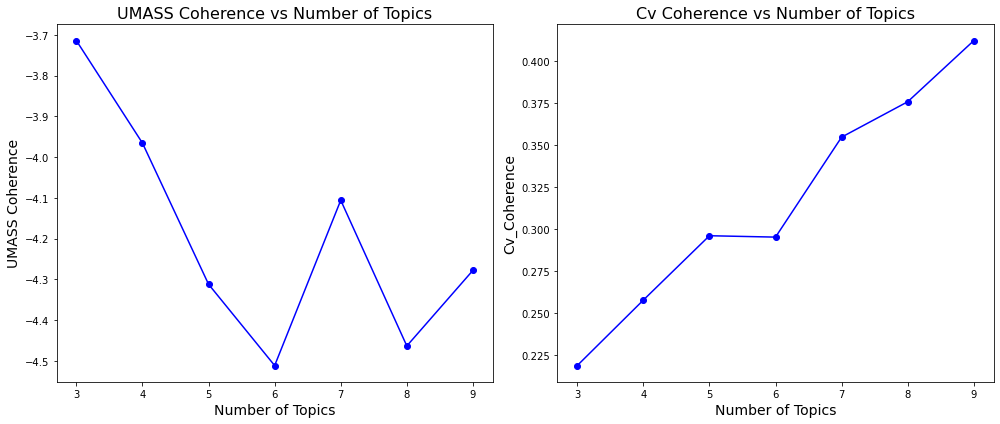

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Grafico per UMASS Coherence
ax1.plot(metrics["topics"].values, metrics["UMASS coherence"].values, marker='o', linestyle='-', color='b')
ax1.set_xlabel("Number of Topics", fontsize=14)
ax1.set_ylabel("UMASS Coherence", fontsize=14)
ax1.set_title("UMASS Coherence vs Number of Topics", fontsize=16)

# Grafico per Cv_Coherence
ax2.plot(metrics["topics"].values, metrics["Cv_Coherence"].values, marker='o', linestyle='-', color='b')
ax2.set_xlabel("Number of Topics", fontsize=14)
ax2.set_ylabel("Cv_Coherence", fontsize=14)
ax2.set_title("Cv Coherence vs Number of Topics", fontsize=16)

plt.tight_layout()
plt.show()

We proceed to perform LDA with five topics, as it has the highest value for Cv coherence and the second highest for UMASS coherence.

In [47]:
# Number of topics
num_topics = 7

# Create LDA model
lda_model = LdaModel(
    corpus=bow_corpus,
    chunksize=1000,
    passes=20,
    id2word=dictionary,
    num_topics=num_topics,
    alpha='auto',
    eta='auto',
    random_state=42
)

# Print Coherence Scores
print("Cv_Coherence:", CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='c_v').get_coherence())
print("UMASS coherence:", CoherenceModel(model=lda_model, texts=filtered_corpus, dictionary=dictionary, coherence='u_mass').get_coherence())

# Save the model
lda_model.save('lda.model')

Cv_Coherence: 0.35463218056273665
UMASS coherence: -4.105791699859073


In [48]:
lda_model_topics = lda_model.show_topics(num_topics=7, num_words=10)

for topic, words in lda_model_topics:
    print(f"Topic {topic}: {words}")

Topic 0: 0.030*"could" + 0.028*"think" + 0.023*"say" + 0.023*"guy" + 0.022*"thank" + 0.022*"want" + 0.022*"work" + 0.021*"well" + 0.019*"still" + 0.018*"right"
Topic 1: 0.035*"cut" + 0.023*"strange" + 0.020*"put" + 0.015*"power" + 0.014*"super" + 0.013*"stone" + 0.013*"name" + 0.013*"less" + 0.012*"morgan" + 0.012*"poster"
Topic 2: 0.020*"also" + 0.019*"use" + 0.018*"look" + 0.014*"sure" + 0.013*"thing" + 0.012*"seem" + 0.011*"year" + 0.011*"find" + 0.010*"mean" + 0.010*"play"
Topic 3: 0.049*"man" + 0.040*"cap" + 0.033*"thor" + 0.028*"iron" + 0.023*"suit" + 0.023*"spider" + 0.020*"civil" + 0.020*"anthony" + 0.017*"god" + 0.014*"peggy"
Topic 4: 0.028*"scene" + 0.027*"one" + 0.017*"good" + 0.016*"first" + 0.016*"people" + 0.016*"time" + 0.013*"much" + 0.013*"love" + 0.012*"kind" + 0.012*"really"
Topic 5: 0.034*"make" + 0.025*"see" + 0.021*"ever" + 0.019*"yeah" + 0.018*"give" + 0.016*"need" + 0.015*"big" + 0.014*"little" + 0.014*"great" + 0.013*"pretty"
Topic 6: 0.018*"film" + 0.017*"endg

# **Results visualization**

In [49]:
pyLDAvis.enable_notebook()
LDAvis_lda  = gensimvis.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary, sort_topics=True)
LDAvis_lda

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.271645 -0.051372       1        1  22.878154
4     -0.173420  0.353014       2        1  18.679562
2     -0.112646 -0.301244       3        1  17.354051
0      0.280922  0.081734       4        1  15.314163
5      0.165839 -0.045915       5        1  12.864246
1      0.064846 -0.018454       6        1   7.174499
3      0.046104 -0.017763       7        1   5.735326, topic_info=            Term         Freq        Total Category  logprob  loglift
19          make  2965.000000  2965.000000  Default  30.0000  30.0000
190        scene  3539.000000  3539.000000  Default  29.0000  29.0000
526        could  3094.000000  3094.000000  Default  28.0000  28.0000
78           one  3453.000000  3453.000000  Default  27.0000  27.0000
155          man  1920.000000  1920.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2289     husband   240.364301   241.307894   Topic7  -5.0901   2.8546
1956      barely   235.398641   236.342642   Topic7  -5.1109   2.8545
2685  production   231.507935   232.454133   Topic7  -5.1276   2.8544
681       asgard   223.247503   224.189774   Topic7  -5.1639   2.8543
1513        lift   216.155582   217.097864   Topic7  -5.1962   2.8542

[246 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
575       3  0.999261      able
1304      3  0.999149     actor
862       1  0.999127  actually
91        5  0.998915       add
1922      2  0.999219     agree
...     ...       ...       ...
347       4  0.999554      work
348       3  0.999256     world
142       5  0.999137      yeah
94        3  0.998963      year
1039      3  0.999087       yes

[224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 3, 1, 6, 2, 4])

To visualise the result, we generated WordCloud based on
the word weights for each topic. The weights were computed
using the γ parameter, set to 0.6, which is used to balance
two factors: the probability of a term within a topic against its
overall probability in the corpus and the overall probability of
the term in the corpus in the pyLDAvis library.

Then, we assign each topic a label that we believe briefly captures its essence

In [50]:
# Extract relevant columns from topic_info
selected_columns = [ 'Term', 'Freq', 'Total', 'Category', 'logprob', 'loglift']
topic_info_df = LDAvis_lda.topic_info[selected_columns]

# Create a DataFrame
topics_df = pd.DataFrame(topic_info_df)
# Calculate the new column 'slide_value'
topics_df['slide_value'] = (0.4) * topics_df['loglift'] + 0.6 * topics_df['logprob']
topics_df = topics_df[topics_df['Category'] != 'Default']
# Display the DataFrame

# Find the index of the row with the term "tea" in the 'Term' column
tea_index = topics_df[topics_df['Term'] == 'coffee'].index

# Update the 'slide_value' for the term "tea" to its negative value
topics_df.loc[tea_index, 'slide_value'] = -topics_df.loc[tea_index, 'slide_value']

topics_df

,Term,Freq,Total,Category,logprob,loglift,slide_value
696,film,2834.803048,2835.760310,Topic1,-4.0060,1.4747,-1.81372
137,endgame,2626.410548,2627.367846,Topic1,-4.0824,1.4746,-1.85960
551,mcu,2481.765099,2482.722576,Topic1,-4.1390,1.4746,-1.89356
435,war,2257.670109,2258.627268,Topic1,-4.2337,1.4746,-1.95038
364,character,1870.539888,1871.497208,Topic1,-4.4218,1.4745,-2.06328
...,...,...,...,...,...,...,...
2289,husband,240.364301,241.307894,Topic7,-5.0901,2.8546,-1.91222
1956,barely,235.398641,236.342642,Topic7,-5.1109,2.8545,-1.92474
2685,production,231.507935,232.454133,Topic7,-5.1276,2.8544,-1.93480
681,asgard,223.247503,224.189774,Topic7,-5.1639,2.8543,-1.95662


In [73]:
topic_terms = defaultdict(list)

# Iterate over the DataFrame to populate the dictionary
for index, row in topics_df.iterrows():
    category = row['Category']
    term = row['Term']
    slide_value = row['slide_value']
    topic_terms[category].append((term, slide_value))

In [74]:
import json

# Supponendo che topic_terms sia già stato creato
with open('topic_terms.json', 'w') as json_file:
    json.dump(topic_terms, json_file)

In [55]:
import matplotlib.font_manager

# Visualizza i tipi di carattere disponibili
available_fonts = matplotlib.font_manager.findSystemFonts(fontext='ttf')
print(available_fonts)


['C:\\Windows\\Fonts\\ITCKRIST.TTF', 'C:\\WINDOWS\\Fonts\\ArialNova-Italic.ttf', 'C:\\WINDOWS\\Fonts\\BELLI.TTF', 'C:\\WINDOWS\\Fonts\\georgiaz.ttf', 'C:\\Windows\\Fonts\\RockwellNova-BoldItalic.ttf', 'C:\\Windows\\Fonts\\GillSansUltraBoNova.ttf', 'C:\\Windows\\Fonts\\segoeuib.ttf', 'C:\\WINDOWS\\Fonts\\YuGothL.ttc', 'C:\\Windows\\Fonts\\DUBAI-LIGHT.TTF', 'C:\\Windows\\Fonts\\ArialNovaCond-LightItalic.ttf', 'C:\\WINDOWS\\Fonts\\GillSansLightItNova.ttf', 'C:\\WINDOWS\\Fonts\\SitkaVF-Italic.ttf', 'C:\\Windows\\Fonts\\LTYPEB.TTF', 'C:\\Windows\\Fonts\\REFSAN.TTF', 'C:\\WINDOWS\\Fonts\\VerdanaPro-Bold.ttf', 'C:\\Windows\\Fonts\\ANTQUAI.TTF', 'C:\\WINDOWS\\Fonts\\BKANT.TTF', 'C:\\Windows\\Fonts\\ArialNova.ttf', 'C:\\WINDOWS\\Fonts\\GARABD.TTF', 'C:\\Windows\\Fonts\\VerdanaPro-Bold.ttf', 'C:\\WINDOWS\\Fonts\\HPSimplified.ttf', 'C:\\Windows\\Fonts\\mmrtext.ttf', 'C:\\Windows\\Fonts\\FRAMDCN.TTF', 'C:\\WINDOWS\\Fonts\\ArialNova-Light.ttf', 'C:\\Windows\\Fonts\\ArialNovaCond-Bold.ttf', 'C:\\Win